In [1]:
import pandas as pd
df = pd.read_csv("Dataset.csv")
print(df.shape)
print(df.head())


(9523, 10)
   Degree             Major  CGPA Employed  Experience  \
0     MBA         Economics  8.16      yes           9   
1     MBA         Economics  6.66       no           7   
2     MBA           Finance  6.95       no           9   
3     MCA  Computer Science  7.15       no           4   
4  B.Tech  Computer Science  7.70       no           6   

                                              Skills  \
0  R, Econometrics, Data Analysis, Python, Statis...   
1  Data Analysis, R, Econometrics, Python, Statis...   
2           Financial Modeling, Excel, Risk Analysis   
3                Java, Machine Learning, Python, C++   
4                                   C++, Python, SQL   

             Certifications IndustryPreference Job Role Simplified  \
0             AWS Certified                 IT   Financial Analyst   
1                       PMP                 IT   Financial Analyst   
2                 Six Sigma      Manufacturing  Investment Analyst   
3  Data Science Certifi

(9523, 10)
   Degree             Major  CGPA Employed  Experience  \
0     MBA         Economics  8.16      yes           9   
1     MBA         Economics  6.66       no           7   
2     MBA           Finance  6.95       no           9   
3     MCA  Computer Science  7.15       no           4   
4  B.Tech  Computer Science  7.70       no           6   

                                              Skills  \
0  R, Econometrics, Data Analysis, Python, Statis...   
1  Data Analysis, R, Econometrics, Python, Statis...   
2           Financial Modeling, Excel, Risk Analysis   
3                Java, Machine Learning, Python, C++   
4                                   C++, Python, SQL   

             Certifications IndustryPreference Job Role Simplified  \
0             AWS Certified                 IT   Financial Analyst   
1                       PMP                 IT   Financial Analyst   
2                 Six Sigma      Manufacturing  Investment Analyst   
3  Data Science Certifi

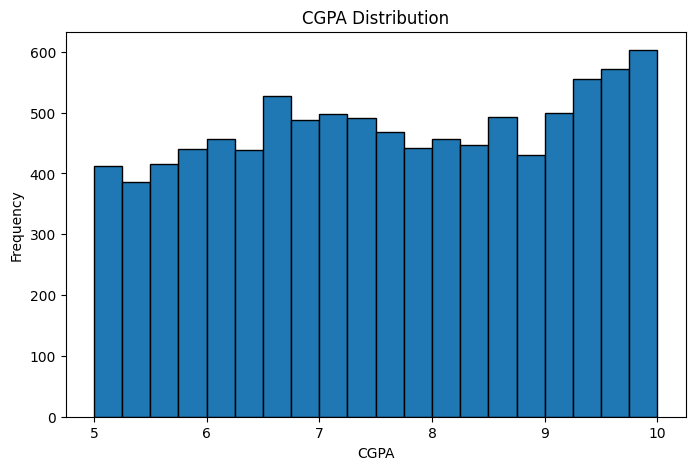

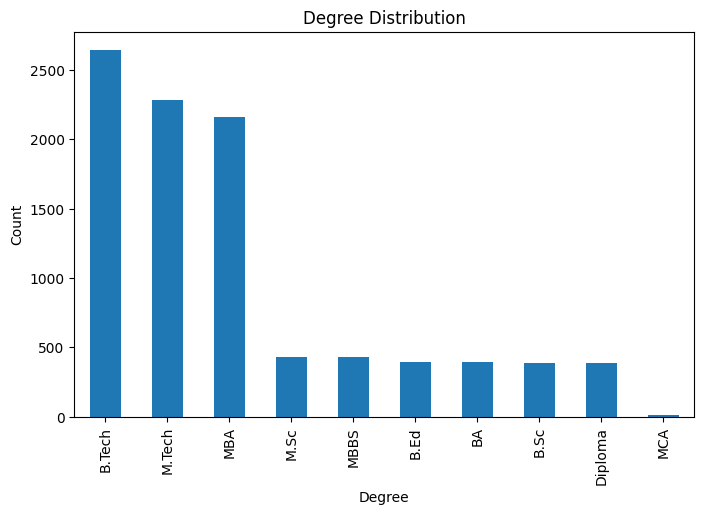

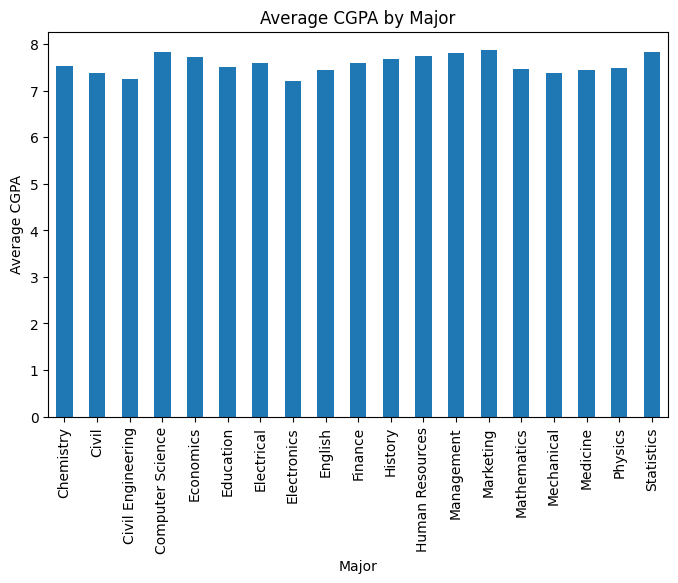

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Dataset.csv")
print(df.shape)
print(df.head())

# Example 1: CGPA distribution
plt.figure(figsize=(8,5))
plt.hist(df['CGPA'], bins=20, edgecolor="black")
plt.title("CGPA Distribution")
plt.xlabel("CGPA")
plt.ylabel("Frequency")
plt.show()

# Example 2: Degree vs Count
plt.figure(figsize=(8,5))
df['Degree'].value_counts().plot(kind='bar')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

# Example 3: Major vs Average CGPA
plt.figure(figsize=(8,5))
df.groupby('Major')['CGPA'].mean().plot(kind='bar')
plt.title("Average CGPA by Major")
plt.xlabel("Major")
plt.ylabel("Average CGPA")
plt.show()


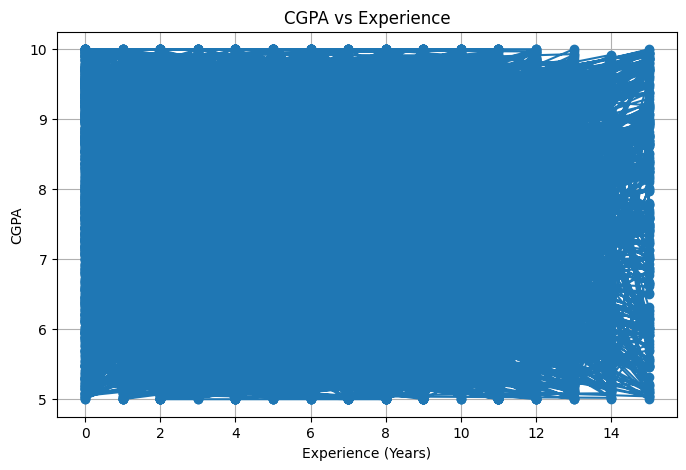

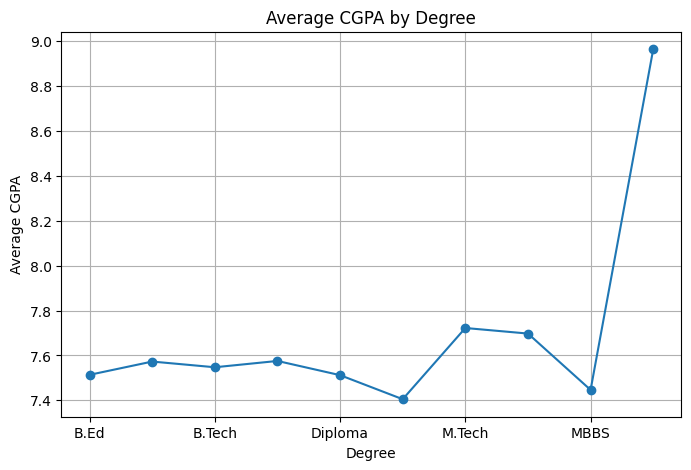

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Dataset.csv")

# Example: Line chart of CGPA vs Experience
plt.figure(figsize=(8,5))
plt.plot(df['Experience'], df['CGPA'], marker='o')
plt.title("CGPA vs Experience")
plt.xlabel("Experience (Years)")
plt.ylabel("CGPA")
plt.grid(True)
plt.show()

# Example: Line chart of Average CGPA by Degree
avg_cgpa = df.groupby("Degree")["CGPA"].mean()
plt.figure(figsize=(8,5))
avg_cgpa.plot(kind="line", marker="o")
plt.title("Average CGPA by Degree")
plt.xlabel("Degree")
plt.ylabel("Average CGPA")
plt.grid(True)
plt.show()


In [4]:
import pandas as pd

data = pd.read_csv("Dataset.csv")
print(data.head())       # shows first 5 rows
print(data.columns)      # shows all column names


   Degree             Major  CGPA Employed  Experience  \
0     MBA         Economics  8.16      yes           9   
1     MBA         Economics  6.66       no           7   
2     MBA           Finance  6.95       no           9   
3     MCA  Computer Science  7.15       no           4   
4  B.Tech  Computer Science  7.70       no           6   

                                              Skills  \
0  R, Econometrics, Data Analysis, Python, Statis...   
1  Data Analysis, R, Econometrics, Python, Statis...   
2           Financial Modeling, Excel, Risk Analysis   
3                Java, Machine Learning, Python, C++   
4                                   C++, Python, SQL   

             Certifications IndustryPreference Job Role Simplified  \
0             AWS Certified                 IT   Financial Analyst   
1                       PMP                 IT   Financial Analyst   
2                 Six Sigma      Manufacturing  Investment Analyst   
3  Data Science Certificate      M

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = pd.read_csv("Dataset.csv")

# 2. Split features (X) and target (y)
X = data.iloc[:, :-1]   # all columns except last
y = data.iloc[:, -1]    # last column is target

# 3. Encode categorical features
X = X.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtypes == 'object' else col)

# 4. Encode target if it's categorical
if y.dtypes == 'object':
    y = LabelEncoder().fit_transform(y)

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 8. Predictions
y_pred = model.predict(X_test)

# 9. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Sample Predictions:", y_pred[:10])


Accuracy: 0.6902887139107612
Sample Predictions: [1 7 2 7 7 0 1 1 2 2]


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = pd.read_csv("Dataset.csv")

# 2. Split features and target
X = data.iloc[:, :-1]   # all columns except last
y = data.iloc[:, -1]    # last column is target

# 3. Encode target if categorical
if y.dtypes == 'object':
    y = LabelEncoder().fit_transform(y)

# 4. Identify categorical columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# 5. Preprocessing: OneHot for categorical, Scale for numeric
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(), X.select_dtypes(exclude=['object']).columns)
    ]
)

# 6. Build pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=2000))
])

# 7. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Fit model
model.fit(X_train, y_train)

# 9. Predictions
y_pred = model.predict(X_test)

# 10. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# 1. Load dataset
data = pd.read_csv("Dataset.csv")

# 2. Split features and target
X = data.iloc[:, :-1]   # all columns except last
y = data.iloc[:, -1]    # last column is target

# 3. Encode target if categorical
if y.dtypes == 'object':
    y = LabelEncoder().fit_transform(y)

# 4. Identify categorical columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# 5. Preprocessor: OneHot for categorical, Scale for numeric
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(), num_cols)
    ]
)

# 6. Define models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "SVM": SVC()
}

# 7. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Train and evaluate each model
results = {}
for name, clf in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", clf)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# 9. Best model
best_model = max(results, key=results.get)
print("\nBest Model:", best_model, "with Accuracy:", results[best_model])


Logistic Regression Accuracy: 1.0000
Random Forest Accuracy: 1.0000
Gradient Boosting Accuracy: 1.0000
SVM Accuracy: 1.0000

Best Model: Logistic Regression with Accuracy: 1.0


In [8]:
print(data.shape)
print(data.head())
print(data.iloc[:, -1].value_counts())   # check target distribution


(9523, 10)
   Degree             Major  CGPA Employed  Experience  \
0     MBA         Economics  8.16      yes           9   
1     MBA         Economics  6.66       no           7   
2     MBA           Finance  6.95       no           9   
3     MCA  Computer Science  7.15       no           4   
4  B.Tech  Computer Science  7.70       no           6   

                                              Skills  \
0  R, Econometrics, Data Analysis, Python, Statis...   
1  Data Analysis, R, Econometrics, Python, Statis...   
2           Financial Modeling, Excel, Risk Analysis   
3                Java, Machine Learning, Python, C++   
4                                   C++, Python, SQL   

             Certifications IndustryPreference Job Role Simplified  \
0             AWS Certified                 IT   Financial Analyst   
1                       PMP                 IT   Financial Analyst   
2                 Six Sigma      Manufacturing  Investment Analyst   
3  Data Science Certifi